In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

df=pd.read_csv('/kaggle/input/paris-2024-olympics-medals/olympics2024.csv')

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/paris-2024-olympics-medals/olympics2024.csv


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Rank          91 non-null     int64 
 1   Country       91 non-null     object
 2   Country Code  91 non-null     object
 3   Gold          91 non-null     int64 
 4   Silver        91 non-null     int64 
 5   Bronze        91 non-null     int64 
 6   Total         91 non-null     int64 
dtypes: int64(5), object(2)
memory usage: 5.1+ KB


In [3]:
df.duplicated().sum()

0

In [4]:
df['Country'].value_counts().sum()

91

In [5]:
df[(df['Gold']==0)&(df['Silver']==0)&(df['Bronze']==0)]

,Rank,Country,Country Code,Gold,Silver,Bronze,Total


# There are no duplicates and null values in this DataSet of 91 countries

In [6]:
df.groupby("Country").value_counts()

Country        Rank  Country Code  Gold  Silver  Bronze  Total
Albania        80    ALB           0     0       2       2        1
Algeria        39    ALG           2     0       1       3        1
Argentina      52    ARG           1     1       1       3        1
Armenia        66    ARM           0     3       1       4        1
Australia      4     AUS           18    19      16      53       1
                                                                 ..
Uganda         55    UGA           1     1       0       2        1
Ukraine        22    UKR           3     5       4       12       1
United States  1     US            40    44      42      126      1
Uzbekistan     13    UZB           8     2       3       13       1
Zambia         84    ZAM           0     0       1       1        1
Name: count, Length: 91, dtype: int64

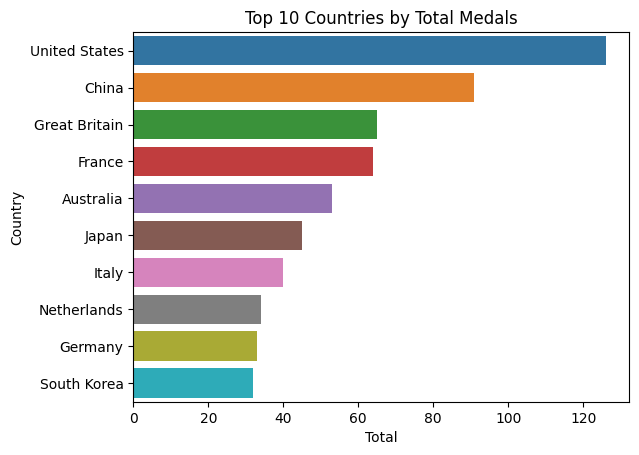

In [7]:
top_countries = df.nlargest(10, 'Total')
sns.barplot(x='Total', y='Country', data=top_countries)
plt.title('Top 10 Countries by Total Medals')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


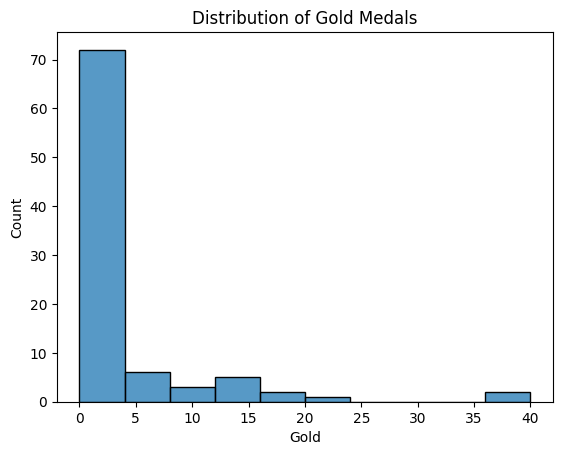

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


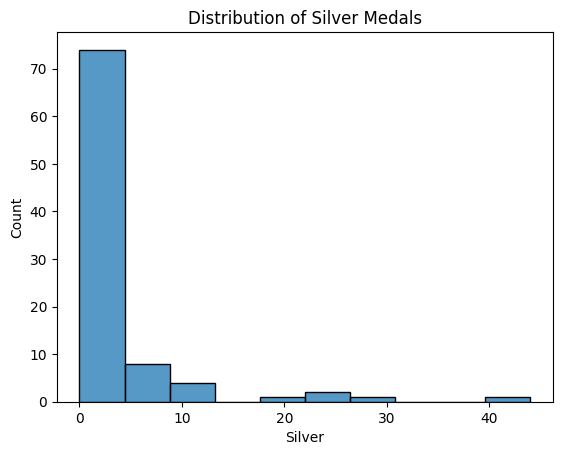

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


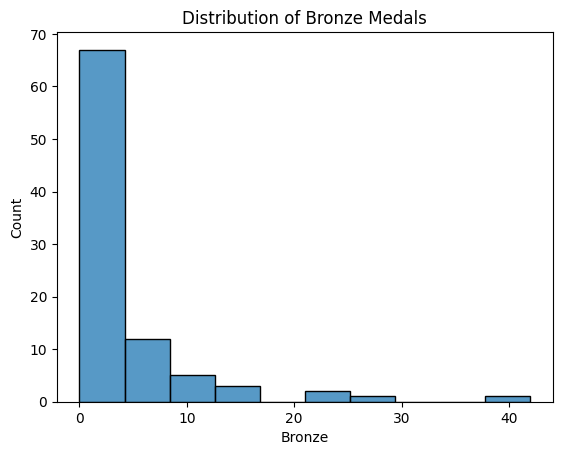

In [8]:

sns.histplot(df['Gold'], bins=10, kde=False)
plt.title('Distribution of Gold Medals')
plt.show()

sns.histplot(df['Silver'], bins=10, kde=False)
plt.title('Distribution of Silver Medals')
plt.show()

sns.histplot(df['Bronze'], bins=10, kde=False)
plt.title('Distribution of Bronze Medals')
plt.show()

In [9]:
df

,Rank,Country,Country Code,Gold,Silver,Bronze,Total
0,1,United States,US,40,44,42,126
1,2,China,CHN,40,27,24,91
2,3,Japan,JPN,20,12,13,45
3,4,Australia,AUS,18,19,16,53
4,5,France,FRA,16,26,22,64
...,...,...,...,...,...,...,...
86,84,Peru,PER,0,0,1,1
87,84,Qatar,QAT,0,0,1,1
88,84,Singapore,SIN,0,0,1,1
89,84,Slovakia,SVK,0,0,1,1


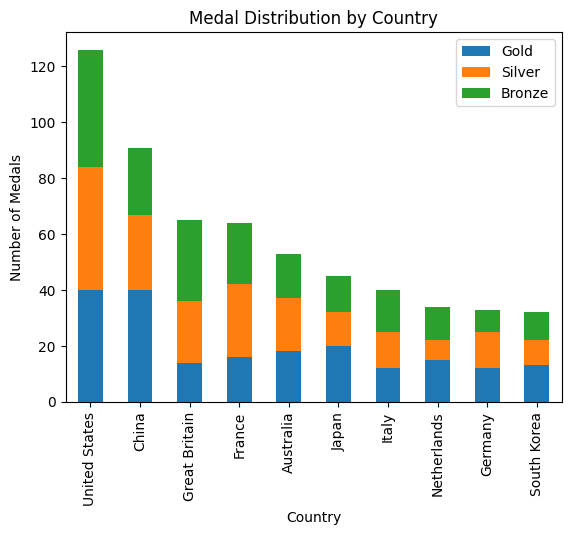

In [10]:
top_countries = df.nlargest(10, 'Total')
top_countries.set_index('Country')[['Gold', 'Silver', 'Bronze']].plot(kind='bar', stacked=True)
plt.title('Medal Distribution by Country')
plt.ylabel('Number of Medals')
plt.show()

# Getting top 10 Countries by total medal count

# Looping through each country and getting ratio of their

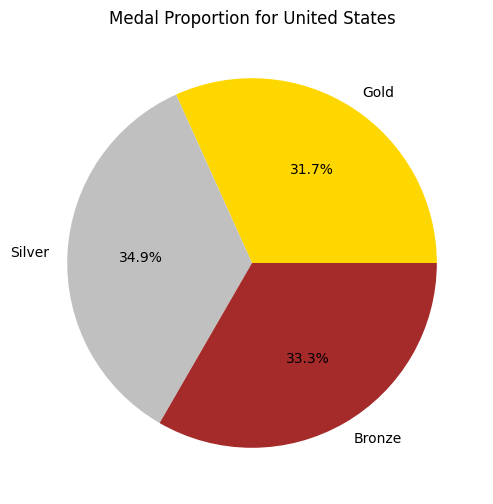

United States: 126 total medals


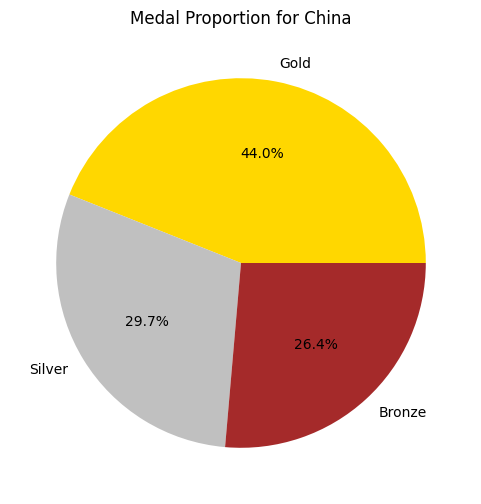

China: 91 total medals


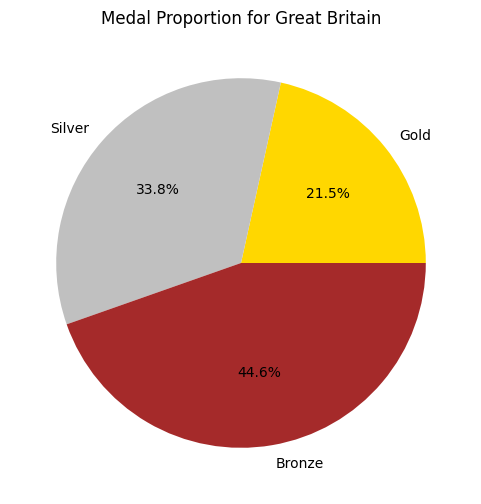

Great Britain: 65 total medals


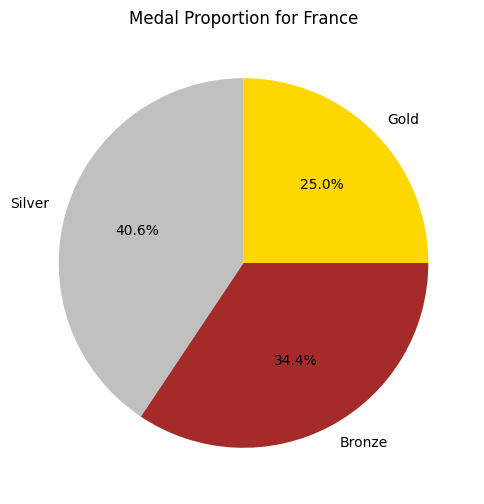

France: 64 total medals


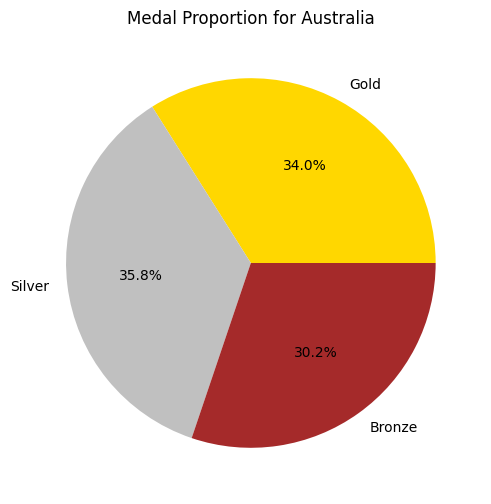

Australia: 53 total medals


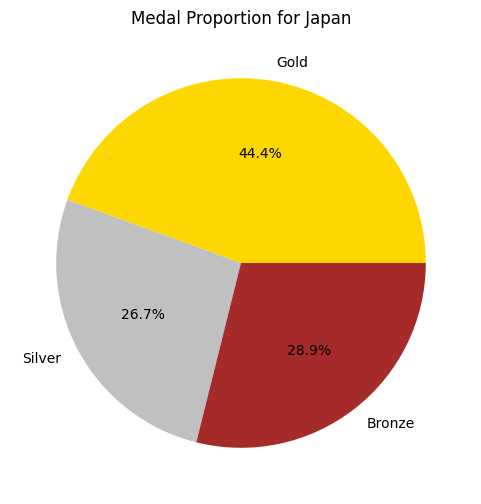

Japan: 45 total medals


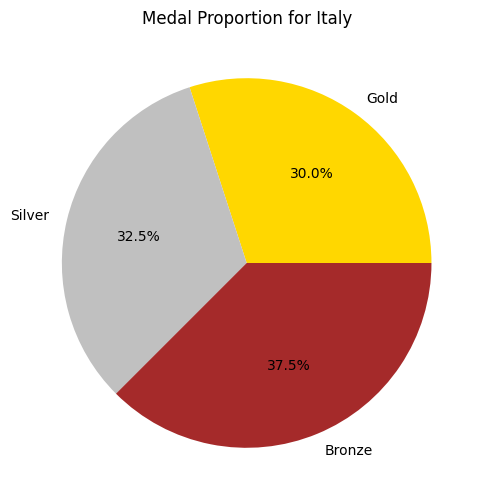

Italy: 40 total medals


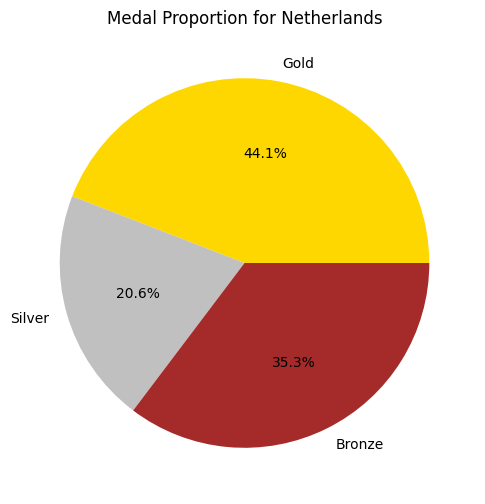

Netherlands: 34 total medals


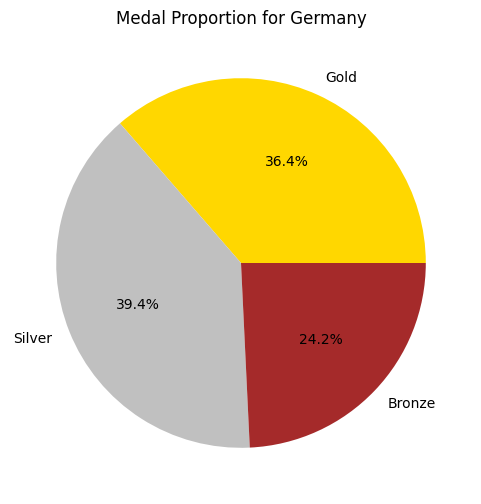

Germany: 33 total medals


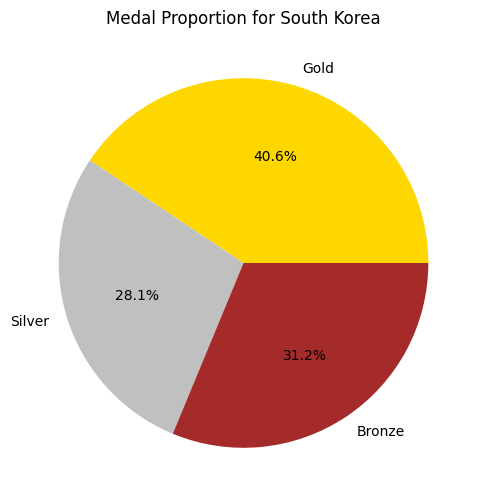

South Korea: 32 total medals


In [11]:
for country in top_countries['Country']:
    medals = top_countries[top_countries['Country'] == country][['Gold', 'Silver', 'Bronze']].values.flatten()
    plt.figure(figsize=(6, 6))
    plt.pie(medals, labels=['Gold', 'Silver', 'Bronze'], colors = ['gold', 'silver', 'brown'], autopct='%1.1f%%')
    plt.title(f'Medal Proportion for {country}')
    plt.show()
    total_medals = top_countries.loc[top_countries['Country'] == country, 'Total'].values[0]
    print(f"{country}: {total_medals} total medals")


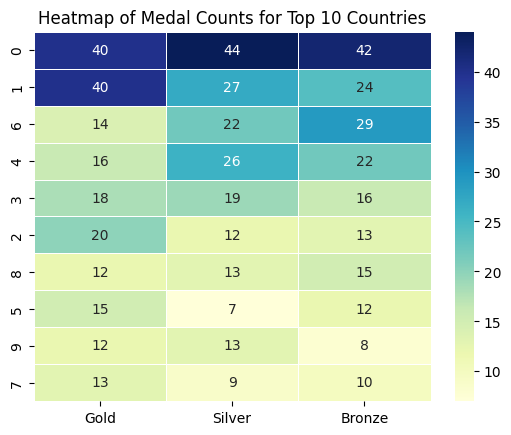

In [12]:
sns.heatmap(top_countries[['Gold', 'Silver', 'Bronze']], annot=True, cmap='YlGnBu', linewidths=.5)
plt.title('Heatmap of Medal Counts for Top 10 Countries')
plt.show()

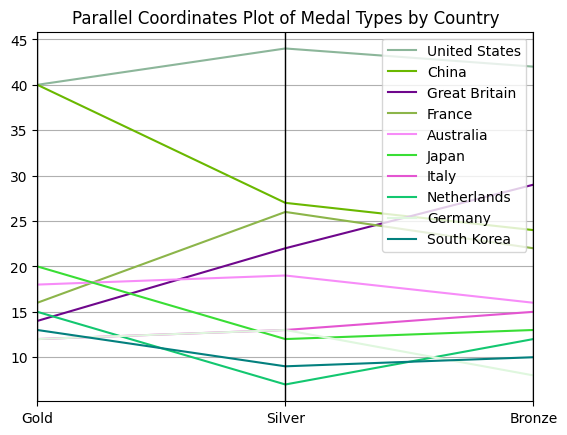

In [13]:
from pandas.plotting import parallel_coordinates

parallel_coordinates(top_countries, 'Country', cols=['Gold', 'Silver', 'Bronze'])
plt.title('Parallel Coordinates Plot of Medal Types by Country')
plt.show()